In [161]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [162]:
# Import the necessary libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 

import warnings
warnings.filterwarnings('ignore')

In [163]:
train_data = pd.read_csv("/kaggle/input/titanic/train.csv")
# See a sample of the dataset
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [164]:
test_data = pd.read_csv(("/kaggle/input/titanic/test.csv"))
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [165]:
# Get a list of the features within the training dataset 
print(train_data.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [166]:
# See a summary of the training dataset
train_data.describe(include= "all")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


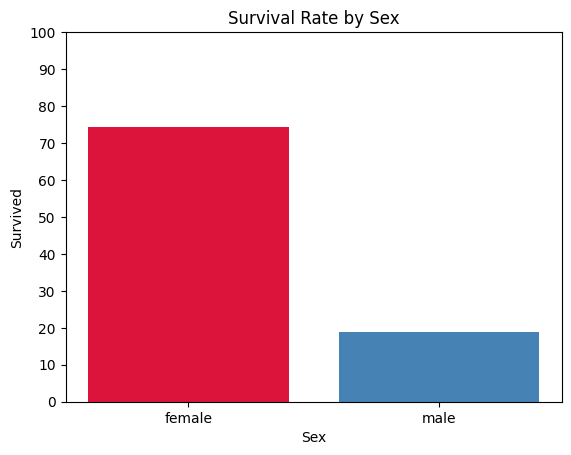

Percentage of females who survived: 74.20382165605095
Percentage of males who survived: 18.890814558058924


In [167]:
# Draw a barplot of survival by sex 
survival_rates = train_data.groupby('Sex')['Survived'].mean() * 100
plt.bar(survival_rates.index, survival_rates.values, color=['crimson', 'steelblue'])
plt.title('Survival Rate by Sex')
plt.xlabel('Sex')
plt.ylabel('Survived')
plt.yticks(range(0, 101, 10)) 
plt.show()

# Print percentages of females vs males who survived
print("Percentage of females who survived:", survival_rates['female'])
print("Percentage of males who survived:", survival_rates['male'])

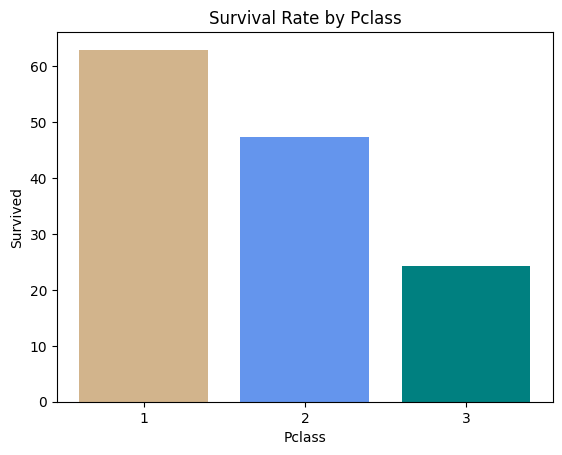

Percentage of Pclass = 1 who survived: 62.96296296296296
Percentage of Pclass = 2 who survived: 47.28260869565217
Percentage of Pclass = 3 who survived: 24.236252545824847


In [168]:
# Draw a barplot of survival by passenger class
pclass_survival = train_data.groupby('Pclass')['Survived'].mean() * 100
plt.bar(pclass_survival.index, pclass_survival.values, color=['tan', 'cornflowerblue', 'teal'])
plt.title('Survival Rate by Pclass')
plt.xlabel('Pclass')
plt.ylabel('Survived')
plt.xticks([1, 2, 3])
plt.show()

# Print percentage of people by pclass that survived
print("Percentage of Pclass = 1 who survived:", pclass_survival[1])
print("Percentage of Pclass = 2 who survived:", pclass_survival[2])
print("Percentage of Pclass = 3 who survived:", pclass_survival[3])

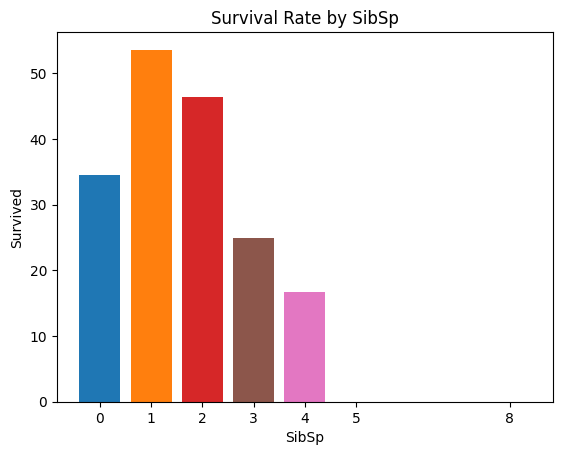

In [169]:
# Draw a barplot of survival by SibSp 
sibsp_survival = train_data.groupby('SibSp')['Survived'].mean() * 100
colors = plt.cm.tab10(np.linspace(0, 1, len(sibsp_survival)))
plt.bar(sibsp_survival.index, sibsp_survival.values, color=colors)
plt.title('Survival Rate by SibSp')
plt.xlabel('SibSp')
plt.ylabel('Survived')
plt.xticks(sibsp_survival.index)
plt.show()

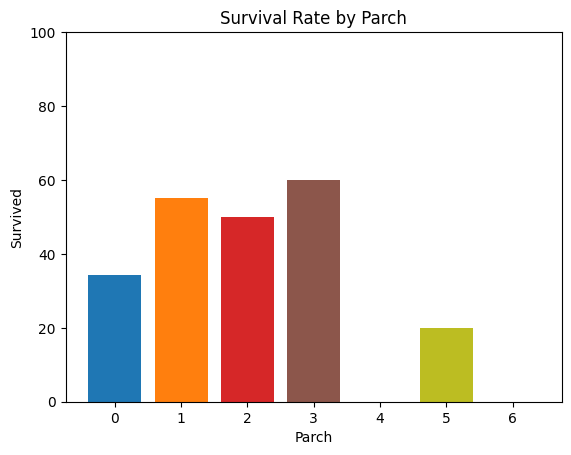

In [170]:
# Draw a barplot of survival by Parch
parch_survival = train_data.groupby('Parch')['Survived'].mean() * 100
colors = plt.cm.tab10(np.linspace(0, 1, len(parch_survival)))
plt.bar(parch_survival.index, parch_survival.values, color=colors)
plt.title('Survival Rate by Parch')
plt.xlabel('Parch')
plt.ylabel('Survived')
plt.ylim(0, 100)
plt.show()

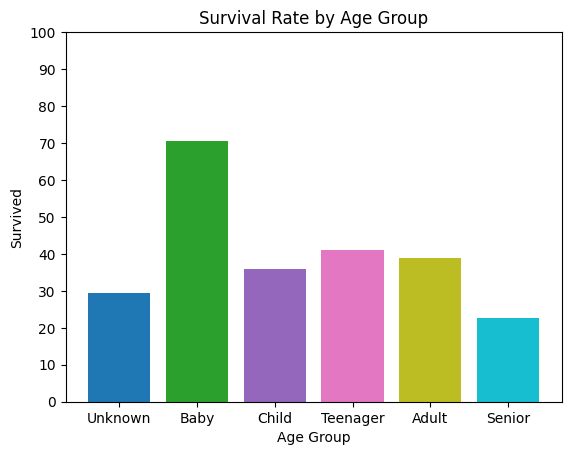

In [171]:
# Fill missing ages with -0.5 (mark 'Unknown')
train_data["Age"] = train_data["Age"].fillna(-0.5)
test_data["Age"] = test_data["Age"].fillna(-0.5)

# Define bins and labels
bins = [-1, 0, 5, 12, 19, 60, np.inf]
labels = ['Unknown', 'Baby', 'Child', 'Teenager', 'Adult', 'Senior']

# Create AgeGroup categorical feature
train_data['AgeGroup'] = pd.cut(train_data["Age"], bins=bins, labels=labels)
test_data['AgeGroup'] = pd.cut(test_data["Age"], bins=bins, labels=labels)

# Calculate survival rate by AgeGroup 
age_survival = train_data.groupby('AgeGroup')['Survived'].mean() * 100

# Generate colors automatically using a colormap
colors = plt.cm.tab10(np.linspace(0, 1, len(age_survival)))

# Draw a barplot of survival by age
plt.bar(age_survival.index.astype(str), age_survival.values, color=colors)

plt.title('Survival Rate by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Survived')
plt.ylim(0, 100)
plt.yticks(range(0, 101, 10))
plt.show()

In [172]:
test_data.describe(include="all")

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup
count,418.000000,418.000000,418,418,418.000000,418.000000,418.000000,418,417.000000,91,418,418
unique,NaN,NaN,418,2,NaN,NaN,NaN,363,NaN,76,3,6
top,NaN,NaN,"Kelly, Mr. James",male,NaN,NaN,NaN,PC 17608,NaN,B57 B59 B63 B66,S,Adult
freq,NaN,NaN,1,266,NaN,NaN,NaN,5,NaN,3,270,260
mean,1100.500000,2.265550,NaN,NaN,23.941388,0.447368,0.392344,NaN,35.627188,NaN,NaN,NaN
std,120.810458,0.841838,NaN,NaN,17.741080,0.896760,0.981429,NaN,55.907576,NaN,NaN,NaN
min,892.000000,1.000000,NaN,NaN,-0.500000,0.000000,0.000000,NaN,0.000000,NaN,NaN,NaN
25%,996.250000,1.000000,NaN,NaN,9.000000,0.000000,0.000000,NaN,7.895800,NaN,NaN,NaN
50%,1100.500000,3.000000,NaN,NaN,24.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN,NaN
75%,1204.750000,3.000000,NaN,NaN,35.750000,1.000000,0.000000,NaN,31.500000,NaN,NaN,NaN


In [173]:
# Drop the cabin feature from both datasets
train_data = train_data.drop(['Cabin'], axis=1)
test_data = test_data.drop(['Cabin'], axis=1)

In [174]:
# Drop the ticket feature from both datasets 
train_data = train_data.drop(['Ticket'], axis=1)
test_data = test_data.drop(['Ticket'], axis=1)

In [175]:
print("Number of people embarking in Southampton (S):")
southampton = train_data[train_data["Embarked"] == "S"].shape[0]
print(southampton)

print("Number of people embarking in Cherbourg(C):")
cherbourg = train_data[train_data["Embarked"] == "C"].shape[0]
print(cherbourg)

print("Number of people embarking in Queenstown(Q):")
queenstown = train_data[train_data["Embarked"] == "Q"].shape[0]
print(queenstown)

Number of people embarking in Southampton (S):
644
Number of people embarking in Cherbourg(C):
168
Number of people embarking in Queenstown(Q):
77


In [176]:
# Replacing the missing values in the Embarked feature with S
train_data = train_data.fillna({"Embarked": "S"})
test_data = test_data.fillna({"Embarked": "S"})

In [177]:
combine = [train_data, test_data] 

for dataset in combine: 
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

pd.crosstab(train_data['Title'], train_data['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [178]:
# Group rare/unusual titles together
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Capt', 'Col',
    'Don', 'Dr', 'Major', 'Rev', 'Jonkheer', 'Dona'], 'Rare')
    
    dataset['Title'] = dataset['Title'].replace(['Countess', 'Lady', 'Sir'], 'Royal')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')

train_data[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.250000
5,Royal,1.000000


In [179]:
# Convert each title into a numeric value for modeling
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Royal": 5, "Rare": 6}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,AgeGroup,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,Adult,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,Adult,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,Adult,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,Adult,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,Adult,1


In [180]:
# Fill missing age with mode age group for each title
mr_age = train_data[train_data["Title"] == 1]["AgeGroup"].mode() #Adult
miss_age = train_data[train_data["Title"] == 2]["AgeGroup"].mode() #Teenager
mrs_age = train_data[train_data["Title"] == 3]["AgeGroup"].mode() #Adult
master_age = train_data[train_data["Title"] == 4]["AgeGroup"].mode() #Child
royal_age = train_data[train_data["Title"] == 5]["AgeGroup"].mode() #Adult
rare_age = train_data[train_data["Title"] == 6]["AgeGroup"].mode() #Adult

age_title_mapping = {1: "Adult", 2: "Teenager", 3: "Adult", 4: "Child", 5: "Adult", 6: "Adult"}

for x in range(len(train_data["AgeGroup"])):
    if train_data["AgeGroup"][x] == "Unknown":
        title = train_data["Title"][x]
        if title in age_title_mapping:
            train_data["AgeGroup"][x] = age_title_mapping[title]
        else:
            # Assign a default value for unknown titles
            train_data["AgeGroup"][x] = "Adult"
        
for x in range(len(test_data["AgeGroup"])):
    if test_data["AgeGroup"][x] == "Unknown":
        title = test_data["Title"][x]
        if title in age_title_mapping:
            test_data["AgeGroup"][x] = age_title_mapping[title]
        else:
            test_data["AgeGroup"][x] = "Adult"

In [181]:
# Map each age value to a numerical value
age_mapping = {'Unknown': 0, 'Baby': 1, 'Child': 2, 'Teenager': 3, 'Adult': 4, 'Senior': 5}
train_data['AgeGroup'] = train_data['AgeGroup'].map(age_mapping)
test_data['AgeGroup'] = test_data['AgeGroup'].map(age_mapping)

train_data.head()

# Drop the age feature
train_data = train_data.drop(['Age'], axis = 1)
test_data = test_data.drop(['Age'], axis = 1)

In [182]:
# Drop the name feature
train_data = train_data.drop(['Name'], axis = 1)
test_data = test_data.drop(['Name'], axis = 1)

In [183]:
# Map each sex value to a numerical value
sex_mapping = {"male": 0, "female": 1}
train_data['Sex'] = train_data['Sex'].map(sex_mapping)
test_data['Sex'] = test_data['Sex'].map(sex_mapping)

train_data.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,AgeGroup,Title
0,1,0,3,0,1,0,7.2500,S,4,1
1,2,1,1,1,1,0,71.2833,C,4,3
2,3,1,3,1,0,0,7.9250,S,4,2
3,4,1,1,1,1,0,53.1000,S,4,3
4,5,0,3,0,0,0,8.0500,S,4,1


In [184]:
# Map each embarked value to a numerical value
embarked_mapping = {"S": 1, "C": 2, "Q": 3}
train_data['Embarked'] = train_data['Embarked'].map(embarked_mapping)
test_data['Embarked'] = test_data['Embarked'].map(embarked_mapping)

train_data.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,AgeGroup,Title
0,1,0,3,0,1,0,7.2500,1,4,1
1,2,1,1,1,1,0,71.2833,2,4,3
2,3,1,3,1,0,0,7.9250,1,4,2
3,4,1,1,1,1,0,53.1000,1,4,3
4,5,0,3,0,0,0,8.0500,1,4,1


In [185]:
# Fill in missing fare value in test set with average fare of matching Pclass
for x in range(len(test_data["Fare"])):
    if pd.isnull(test_data["Fare"][x]):
        pclass = test_data["Pclass"][x] #Pclass = 3
        test_data["Fare"][x] = round(train_data[train_data["Pclass"] == pclass]["Fare"].mean(), 4)
        
# Divide fare into 4 equal-sized bands and label them 
train_data['FareBand'] = pd.qcut(train_data['Fare'], 4, labels = [1, 2, 3, 4])
test_data['FareBand'] = pd.qcut(test_data['Fare'], 4, labels = [1, 2, 3, 4])

# Drop fare values
train_data = train_data.drop(['Fare'], axis = 1)
test_data = test_data.drop(['Fare'], axis = 1)

In [186]:
# Check train data
train_data.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Embarked,AgeGroup,Title,FareBand
0,1,0,3,0,1,0,1,4,1,1
1,2,1,1,1,1,0,2,4,3,4
2,3,1,3,1,0,0,1,4,2,2
3,4,1,1,1,1,0,1,4,3,4
4,5,0,3,0,0,0,1,4,1,2


In [187]:
# Check test_data
test_data.head()

,PassengerId,Pclass,Sex,SibSp,Parch,Embarked,AgeGroup,Title,FareBand
0,892,3,0,0,0,3,4,1,1
1,893,3,1,1,0,1,4,3,1
2,894,2,0,0,0,3,5,1,2
3,895,3,0,0,0,1,4,1,2
4,896,3,1,1,1,1,4,3,2


In [189]:
from sklearn.model_selection import train_test_split

predictors = train_data.drop(['Survived', 'PassengerId'], axis=1)
target = train_data["Survived"]
x_train, x_val, y_train, y_val = train_test_split(predictors, target, test_size = 0.22, random_state = 0)

In [190]:
# Train and evaluate a Gaussian Naive Bayes classifier on the data
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

gaussian = GaussianNB()
gaussian.fit(x_train, y_train)
y_pred = gaussian.predict(x_val)
acc_gaussian = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_gaussian)

77.16


In [191]:
# Train and evaluate a Logistic Regression model
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_val)
acc_logreg = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_logreg)

79.19


In [192]:
# Train and evaluate a Random Forest model
from sklearn.ensemble import RandomForestClassifier

randomforest = RandomForestClassifier()
randomforest.fit(x_train, y_train)
y_pred = randomforest.predict(x_val)
acc_randomforest = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_randomforest)

82.74


In [193]:
# Train and evalute k-Nearest Neighbors Classifier
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
y_pred = knn.predict(x_val)
acc_knn = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_knn)

81.22


In [194]:
# Train and evaluate a Stochastic Gradient Descent Classifier
from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier()
sgd.fit(x_train, y_train)
y_pred = sgd.predict(x_val)
acc_sgd = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_sgd)

79.19


In [195]:
# Train and evaluate a Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier

gbk = GradientBoostingClassifier()
gbk.fit(x_train, y_train)
y_pred = gbk.predict(x_val)
acc_gbk = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_gbk)

83.76


In [196]:
model_scores = [
    ('Naive Bayes', acc_gaussian), 
    ('Logistic Regression', acc_logreg),
    ('Random Forest', acc_randomforest),
    ('KNN', acc_knn),
    ('Stochastic Graident Descent Classifier', acc_sgd),
    ('Gradient Boosting Classifier', acc_gbk)
]

models_df = pd.DataFrame(model_scores, columns=['Model', 'Score']).sort_values(by='Score', ascending=False)

models_df

,Model,Score
5,Gradient Boosting Classifier,83.76
2,Random Forest,82.74
3,KNN,81.22
1,Logistic Regression,79.19
4,Stochastic Graident Descent Classifier,79.19
0,Naive Bayes,77.16
